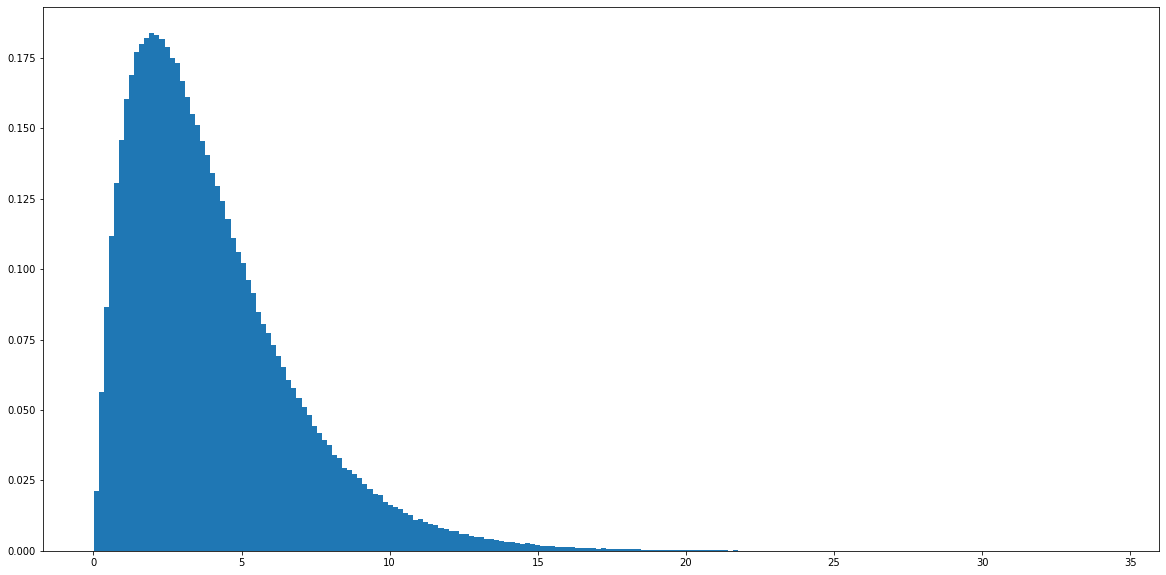

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Central limit theorom
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
# plot
plt.figure(figsize=(20,10))
plt.hist(s, 200, density=True)
plt.show()

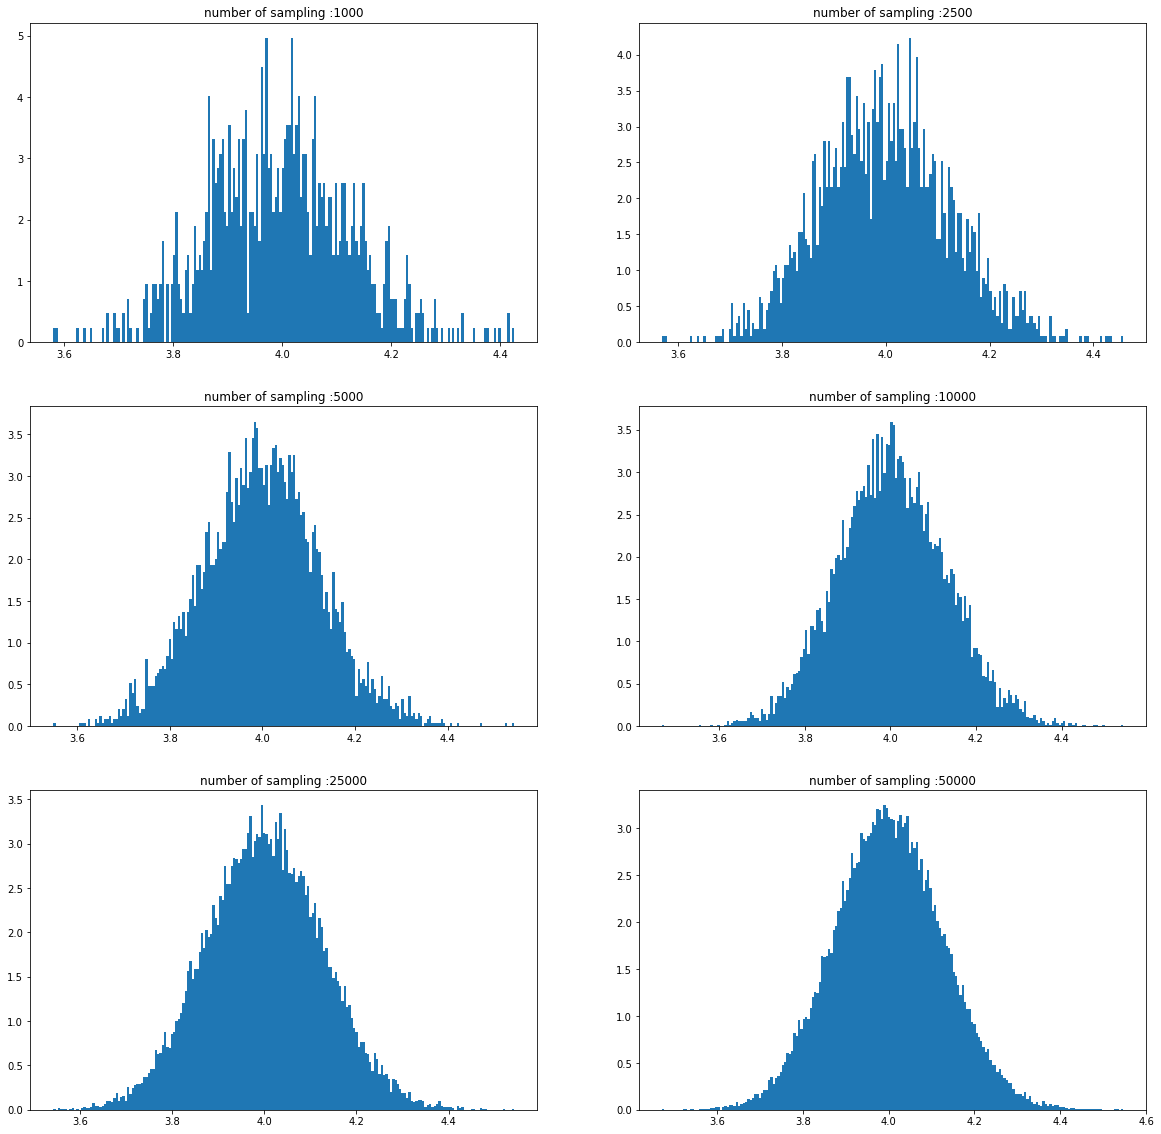

In [2]:
## sample from population and stardardize
# sample 5000 at a time and sum
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for standardize part
lastsam = []
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
        # collect sample for standardize part
        if i == numofsample[len(numofsample)-1]:
            lastsam = rc
    meansample.append(eachmeansample)
    
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

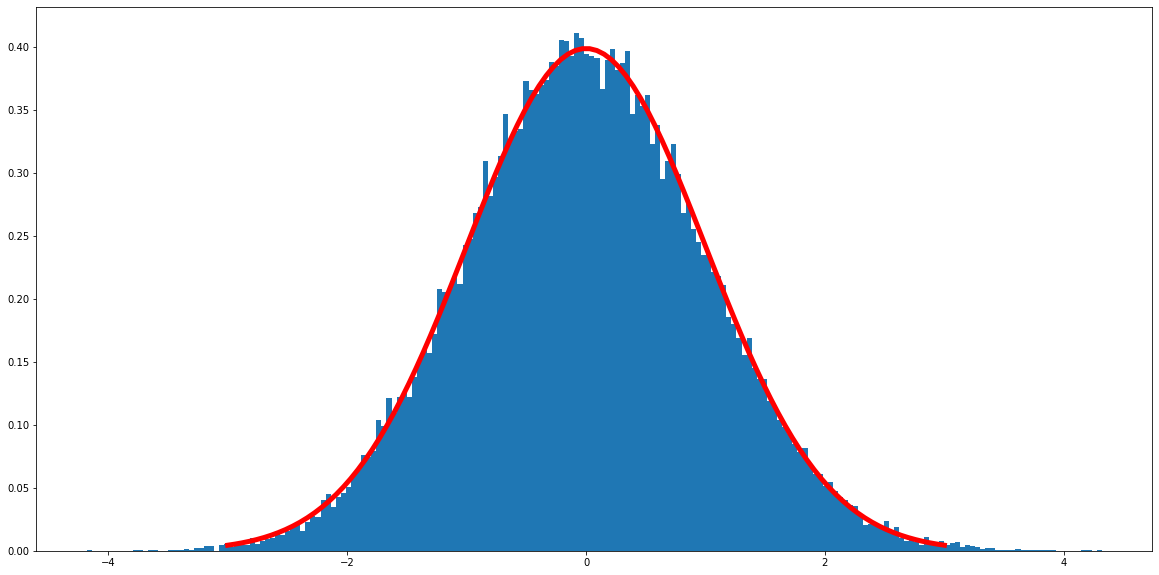

In [3]:
## standardize part
zn = []
# use lastest sample
sm = meansample[len(meansample)-1]
# calculate start deviation
std = np.std(sm)
# set population mean
mean = 4
# for each sample subtract by devide
for i in sm:
    zn.append((i-mean)/std)
    
# plot hist
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()